<a href="https://colab.research.google.com/github/mmosetrov/Certification-1/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Задача посчитать TF-IDF для песен
- Собрать данные
- Загрузка данных
- Очистка данных - препинание, лишний язык, числа и т.д.
- Нормализация данных
- Расчет TF_IDF метрики. Можно сравнить с bag-of-words

In [3]:
!pip install wordcloud # отображение на графике мешка слов

In [4]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=67043e0433c8bb3d65c1a0460c8300daa3010d0138af6b5893b5637ada300f60
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
!pip install pymorphy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 742.8 kB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import os # работа с папкой и файлами
import re # регулярные выражения, доп вариант к очистке
import nltk # работа с пакетами языков
from nltk import word_tokenize, ngrams # токенизация и деление на n граммы
from wordcloud import WordCloud # визуальное отображение
from nltk.corpus import stopwords # стопслова, extend
nltk.download("stopwords")
nltk.download('punkt')
import pymorphy2 # морфологический анализатор
import string # работа со строкой
import pandas as pd # работа с таблицей dataframe
import matplotlib.pyplot as plt # визуальное отображение
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving andyoumylove.txt to andyoumylove.txt
Saving bythesea.txt to bythesea.txt
Saving hallelujah.txt to hallelujah.txt
Saving heaven.txt to heaven.txt
Saving iagainsti.txt to iagainsti.txt
Saving imagine.txt to imagine.txt
Saving letitbe.txt to letitbe.txt
Saving personalJesus.txt to personalJesus.txt
Saving TheBoogieManSong.txt to TheBoogieManSong.txt
Saving thestars.txt to thestars.txt


In [64]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [67]:
path = "/content/play" #путь к фаилам *.txt с текстами песен

In [69]:
for dirpath, _, filenames in os.walk('/content/play'):
   for filename in filenames:
      print(os.path.join(dirpath, filename))

/content/play/imagine.txt
/content/play/hallelujah.txt
/content/play/heaven.txt
/content/play/bythesea.txt
/content/play/iagainsti.txt
/content/play/TheBoogieManSong.txt
/content/play/letitbe.txt
/content/play/andyoumylove.txt
/content/play/personalJesus.txt
/content/play/thestars.txt


In [70]:
#!ls

In [71]:
COMMON_DIR = "/content/play"
def read_song(filename):
    #Функция чтения файла
    text = ''
    with open(f'{COMMON_DIR}/{filename}.txt', 'r', encoding='utf-8') as f:

        text = f.read()
        text = text.replace('\n', ' ')
    return text

In [72]:
texts = []
direct_list = os.listdir(path='/content/play') # файлы в папке
print(direct_list)
# имена песен
names = [song.replace(".txt", "") for song in direct_list]
print(names)


['imagine.txt', 'hallelujah.txt', 'heaven.txt', 'bythesea.txt', 'iagainsti.txt', 'TheBoogieManSong.txt', 'letitbe.txt', 'andyoumylove.txt', 'personalJesus.txt', 'thestars.txt']
['imagine', 'hallelujah', 'heaven', 'bythesea', 'iagainsti', 'TheBoogieManSong', 'letitbe', 'andyoumylove', 'personalJesus', 'thestars']


In [74]:
songs_list = []
for song in names:
    songs_list.append(read_song(song)) #чтение данных

songs_list

["Imagine there's no heaven It's easy if you try No hell below us Above us, only sky Imagine all the people living for today Ah Imagine there's no countries It isn't hard to do Nothing to kill or die for And no religion too Imagine all the people living life in peace You  You may say I'm a dreamer But I'm not the only one I hope some day you'll join us And the world will be as one  Imagine no possessions I wonder if you can No need for greed or hunger A brotherhood of man Imagine all the people sharing all the world You  You may say I'm a dreamer But I'm not the only one I hope some day you'll join us And the world will live as one",
 'Baby I’ve been here before I know this room, I walked this floor I used to live alone here before I knew ya Yeah and I’ve seen your flag on the marble arch But listen love; love is not some kind of victory march No it’s a cold and it’s a very broken Hallelujah Hallelujah, Hallelujah Hallelujah, Hallelujah There was a time you let me know What’s really go

In [75]:
stopwords_list= stopwords.words("english") #стоп-слова
len(stopwords_list)

179

In [76]:
extra_stop = ['yours', 'my', 'it', 'be you', 'I-ya', 'ya', 'I', 'can', 'me', 'us', 'it’s', 'i’m', 'n', 'let’s', 'i’ve', 'can’t', ' what’s', '3', 'let', 'get', '9']
stopwords_list.extend(extra_stop)

In [77]:
len(stopwords_list)

200

In [78]:
def clean_string(text):
    #Функция очищения строк
    string.punctuation += '—'

    text = re.split(' |:|\.|\(|\)|,|"|;|/|\n|\t|-|\?|\[|\]|!', text)
    text = ' '.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    return text

In [79]:
songs_list_сlean = [clean_string(song) for song in songs_list]
songs_list_сlean

["imagine there's heaven easy try hell sky imagine people living today ah imagine there's countries hard nothing kill die religion imagine people living life peace may say i'm dreamer i'm one hope day join world one imagine possessions wonder need greed hunger brotherhood man imagine people sharing world may say i'm dreamer i'm one hope day join world live one",
 'baby know room walked floor used live alone knew yeah seen flag marble arch listen love love kind victory march cold broken hallelujah hallelujah hallelujah hallelujah hallelujah time know what’s really going ah never show well remember yeah moved holy dove moving yes every single breath drew hallelujah hallelujah hallelujah hallelujah hallelujah maybe there’s god ever seem learn love shoot someone drew yeah complaint hear tonight laughter someone claims seen light cold lonely hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah best wasn’t much couldn’t feel learned touch told tr

In [ ]:
morph = pymorphy2.MorphAnalyzer()

def normilize_word(text):
    # привести слова к начальной форме
    words = text.split() # по пробелу разделить
    result_list = []
    for word in words:
        # print(morph.parse(word))
        normal_form = morph.parse(word)[0].normal_form
        result_list.append(normal_form)
        print(normal_form)
    return " ".join(result_list)

In [ ]:
songs_list_norm = [normilize_word(song) for song in songs_list_сlean]
songs_list_norm

imagine
there's
heaven
easy
try
hell
sky
imagine
people
living
today
ah
imagine
there's
countries
hard
nothing
kill
die
religion
imagine
people
living
life
peace
may
say
i'm
dreamer
i'm
one
hope
day
join
world
one
imagine
possessions
wonder
need
greed
hunger
brotherhood
man
imagine
people
sharing
world
may
say
i'm
dreamer
i'm
one
hope
day
join
world
live
one
baby
know
room
walked
floor
used
live
alone
knew
yeah
seen
flag
marble
arch
listen
love
love
kind
victory
march
cold
broken
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
time
know
what’s
really
going
ah
never
show
well
remember
yeah
moved
holy
dove
moving
yes
every
single
breath
drew
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
maybe
there’s
god
ever
seem
learn
love
shoot
someone
drew
yeah
complaint
hear
tonight
laughter
someone
claims
seen
light
cold
lonely
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
hallelujah
best
wasn’t
much
couldn’t
feel
learned
touch
told
truth
di

["imagine there's heaven easy try hell sky imagine people living today ah imagine there's countries hard nothing kill die religion imagine people living life peace may say i'm dreamer i'm one hope day join world one imagine possessions wonder need greed hunger brotherhood man imagine people sharing world may say i'm dreamer i'm one hope day join world live one",
 'baby know room walked floor used live alone knew yeah seen flag marble arch listen love love kind victory march cold broken hallelujah hallelujah hallelujah hallelujah hallelujah time know what’s really going ah never show well remember yeah moved holy dove moving yes every single breath drew hallelujah hallelujah hallelujah hallelujah hallelujah maybe there’s god ever seem learn love shoot someone drew yeah complaint hear tonight laughter someone claims seen light cold lonely hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah hallelujah best wasn’t much couldn’t feel learned touch told tr

In [ ]:
df = []

In [ ]:
df = pd.DataFrame({'name': names, 'song_text': songs_list_norm})

In [ ]:
df.head()

,name,song_text
0,imagine,imagine there's heaven easy try hell sky imagi...
1,hallelujah,baby know room walked floor used live alone kn...
2,heaven,see turning wheel dusty track caught void empt...
3,bythesea,salty river falls asleep bay always gets never...
4,iagainsti,flesh flesh mind mind two kind one won’t survi...


In [ ]:
plt.rcParams["figure.figsize"] = (10,5) # размер графиков

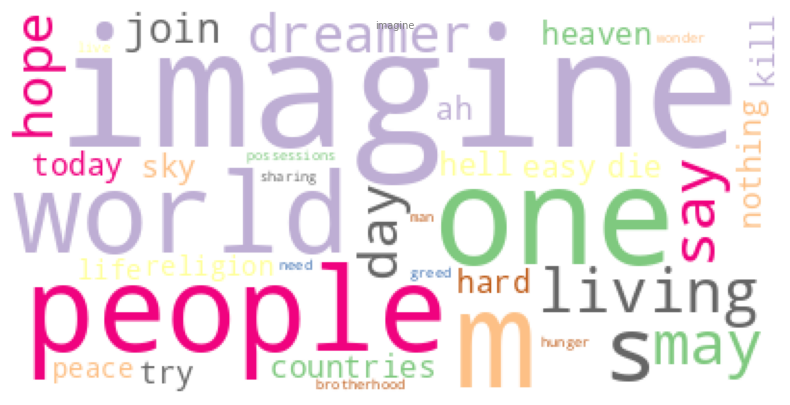

In [ ]:
# TODO вынести в def
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

i = 1

tokens = word_tokenize(df['song_text'][0])
text_raw = " ".join(tokens)
wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(text_raw)
plt.tick_params(labelsize=10)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(df['name'][0],fontdict={'fontsize':7,'color':'grey'},y=0.93)
plt.tick_params(labelsize=10)
i += 1

In [ ]:
# Создание объекта TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(songs_list_norm)

# Получение списка ключевых слов и их значения TF-IDF для первого документа
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка слов по значениям TF-IDF
sorted_keywords = [word for _, word in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Ключевые слова:", sorted_keywords)

Ключевые слова: ['imagine', 'one', 'people', 'world', 'join', 'hope', 'dreamer', 'say', 'day', 'may', 'living', 'there', 'wonder', 'try', 'today', 'sharing', 'religion', 'possessions', 'peace', 'life', 'kill', 'hunger', 'hell', 'hard', 'greed', 'countries', 'brotherhood', 'sky', 'heaven', 'easy', 'die', 'ah', 'nothing', 'man', 'live', 'need', 'yes', 'yeah', 'yard', 'wrong', 'words', 'word', 'wooden', 'won', 'wish', 'wisdom', 'window', 'whole', 'whoever', 'who', 'white', 'whisper', 'wheel', 'what', 'went', 'well', 'way', 'waves', 'wasn', 'warned', 'war', 'want', 'walkers', 'walked', 'walk', 'wake', 'waiting', 'void', 'victory', 've', 'used', 'ups', 'unresponsive', 'unknown', 'ugly', 'two', 'turning', 'tumble', 'truth', 'trust', 'trouble', 'track', 'touch', 'tonight', 'tongue', 'tomorrow', 'told', 'together', 'times', 'time', 'til', 'thousand', 'though', 'things', 'they', 'that', 'test', 'tell', 'telephone', 'target', 'tall', 'take', 'sweet', 'survive', 'surrender', 'supreme', 'stop', 's

In [ ]:
feature_names

array(['across', 'agree', 'ah', 'alone', 'always', 'answer', 'apply',
       'arch', 'armor', 'asleep', 'away', 'baby', 'back', 'bad', 'bar',
       'bay', 'beautiful', 'behind', 'believer', 'belong', 'best', 'bet',
       'beyond', 'blue', 'bone', 'boogie', 'boy', 'breath', 'bridges',
       'bright', 'broken', 'brotherhood', 'building', 'burn', 'canons',
       'cant', 'cares', 'caught', 'chance', 'charms', 'chest', 'claims',
       'close', 'cloudy', 'cold', 'collide', 'combat', 'come', 'comes',
       'complaint', 'confess', 'conflict', 'contact', 'couldn',
       'countries', 'couples', 'dark', 'darken', 'darkness', 'day',
       'death', 'deliver', 'didn', 'die', 'dispute', 'distant', 'done',
       'door', 'dove', 'downs', 'dream', 'dreamer', 'drew', 'drivers',
       'dusty', 'early', 'easy', 'em', 'empty', 'end', 'enemies', 'even',
       'ever', 'every', 'everything', 'eye', 'eyes', 'faith', 'falls',
       'famous', 'far', 'fatal', 'fear', 'feed', 'feel', 'feeling',
       '

In [ ]:
tfidf_scores # TODO добавить в df колонку tf idf за файл общий

array([0.        , 0.        , 0.0834749 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.09819522, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09819522,
       0.        , 0.        , 0.        , 0.        , 0.16694981,
       0.        , 0.        , 0.        , 0.0834749 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19639043, 0.        , 0.        , 0.     

In [ ]:
count_vectorizer = CountVectorizer()

bow = count_vectorizer.fit_transform(songs_list_norm)
bow.shape

(10, 355)

In [ ]:
import operator
vocab_sorted = sorted(count_vectorizer.vocabulary_.items(), key=operator.itemgetter(0))
vocab_sorted

[('across', 0),
 ('agree', 1),
 ('ah', 2),
 ('alone', 3),
 ('always', 4),
 ('answer', 5),
 ('apply', 6),
 ('arch', 7),
 ('armor', 8),
 ('asleep', 9),
 ('away', 10),
 ('baby', 11),
 ('back', 12),
 ('bad', 13),
 ('bar', 14),
 ('bay', 15),
 ('beautiful', 16),
 ('behind', 17),
 ('believer', 18),
 ('belong', 19),
 ('best', 20),
 ('bet', 21),
 ('beyond', 22),
 ('blue', 23),
 ('bone', 24),
 ('boogie', 25),
 ('boy', 26),
 ('breath', 27),
 ('bridges', 28),
 ('bright', 29),
 ('broken', 30),
 ('brotherhood', 31),
 ('building', 32),
 ('burn', 33),
 ('canons', 34),
 ('cant', 35),
 ('cares', 36),
 ('caught', 37),
 ('chance', 38),
 ('charms', 39),
 ('chest', 40),
 ('claims', 41),
 ('close', 42),
 ('cloudy', 43),
 ('cold', 44),
 ('collide', 45),
 ('combat', 46),
 ('come', 47),
 ('comes', 48),
 ('complaint', 49),
 ('confess', 50),
 ('conflict', 51),
 ('contact', 52),
 ('couldn', 53),
 ('countries', 54),
 ('couples', 55),
 ('dark', 56),
 ('darken', 57),
 ('darkness', 58),
 ('day', 59),
 ('death', 60),
 

BERT

In [6]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 25.8 MB/s eta 0:00:00


In [7]:
import torch
import transformers as bert_trained
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [8]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [10]:
df = pd.read_csv("IMDB Dataset.csv")

In [11]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [13]:
df.shape

(50000, 2)

In [14]:
df.describe(include="all")

,review,sentiment
count,50000,50000.000000
unique,49582,NaN
top,Loved today's show!!! It was a variety and not...,NaN
freq,5,NaN
mean,NaN,0.500000
std,NaN,0.500005
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.500000
75%,NaN,1.000000


Text(0.5, 0, 'sentiments')

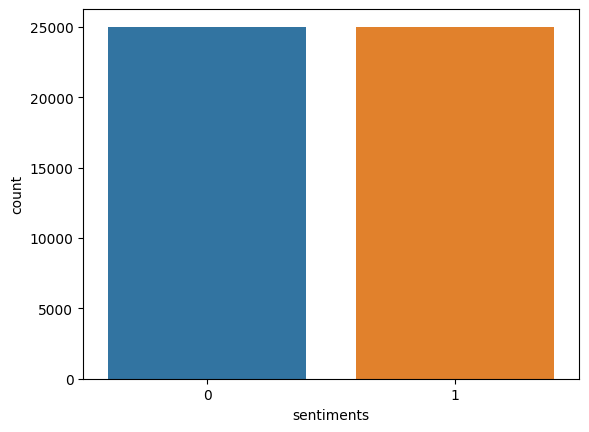

In [15]:
sns.countplot(x=df['sentiment'])
plt.xlabel('sentiments')

In [16]:
# удалим знаки препинания и приведем к нижнему регистру
df['review'] = df['review'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


In [17]:
# загрузка и удаление стоп-слов
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
stop_words.extend(['br']) # добавляет слово в словарь стоп-слов

In [19]:
df.shape

(50000, 2)

In [20]:
from transformers import BertTokenizer

In [21]:
PRE_TRAINED_MODEL_NAME = r'bert-base-uncased'

In [22]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

In [23]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f"Предложение: {sample_txt}")
print(f"Токены: {tokens}")
print(f"Идентификаторы токенов: {token_ids}")

max_len = max([len(sent) for sent in tokens])
print('Max length: ', max_len)

Предложение: When was I last outside? I am stuck at home for 2 weeks.
Токены: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Идентификаторы токенов: [2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]
Max length:  7


In [24]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=10,
  truncation=True,
  add_special_tokens=True,
  return_token_type_ids=False,
  padding='longest',
  return_attention_mask=True,
  return_tensors='pt',
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [25]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

10


tensor([ 101, 2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572,  102])

In [26]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

10


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [27]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])
#[CLS] - непрерывное связывание, sentence-level classification, начало
# [SEP] - разделитель для предложения, конец

['[CLS]', 'when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', '[SEP]']

In [28]:
class IMDBDataset(Dataset):

  def __init__(self, reviews, sentiments, tokenizer, max_len):
    self.reviews = reviews
    self.sentiments = sentiments
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    sentiment = self.sentiments[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'sentiments': torch.tensor(sentiment, dtype=torch.long)
    }

In [29]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = IMDBDataset(
    reviews=df.review.to_numpy(),
    sentiments=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [30]:
short_df = df[:1000]

In [31]:
short_df.shape

(1000, 2)

In [32]:
RANDOM_SEED = 1234

df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [33]:
BATCH_SIZE = 16
MAX_LEN = 32

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [34]:
data = next(iter(train_data_loader))
data.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `

dict_keys(['review', 'input_ids', 'attention_mask', 'sentiments'])

In [35]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [36]:
class IMDBClassifier(nn.Module):

  def __init__(self, n_classes):
    super(IMDBClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [37]:
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu' )

In [41]:
model = IMDBClassifier(len(df['sentiment'].unique()))
model = model.to(device)

NameError: ignored

In [39]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape)
print(attention_mask.shape)

torch.Size([16, 32])
torch.Size([16, 32])


In [40]:
F.softmax(model(input_ids, attention_mask), dim=1)

NameError: ignored

In [42]:
EPOCHS = 4

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

NameError: ignored

In [43]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    sentiments = d["sentiments"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, sentiments)

    correct_predictions += torch.sum(preds == sentiments)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [44]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      sentiments = d["sentiments"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, sentiments)

      correct_predictions += torch.sum(preds == sentiments)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [45]:
%%time

train_a = []
train_l = []
val_a = []
val_l = []
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  train_a.append(train_acc)
  train_l.append(train_loss)
  val_a.append(val_acc)
  val_l.append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/4
----------


NameError: ignored

In [46]:
lt.plot(train_a, label='train accuracy')
plt.plot(val_a, label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

NameError: ignored

In [47]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

NameError: ignored

In [48]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['sentiments'].shape)

torch.Size([16, 32])
torch.Size([16, 32])
torch.Size([16])


In [49]:
short_df = df[:300]

In [50]:
def clean_eng(x):
    return ' '.join([word for word in word_tokenize(x) if word not in stop_words])

In [51]:
short_df

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
295,despite a totally misleading advertising campa...,0
296,this movie sucks ass something about a heatwav...,0
297,i was looking forward to the guardian but when...,1
298,going into see seven pounds i wasnt clearly su...,1


In [52]:
short_df['review'] = short_df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

<ipython-input-52-d8c06fc9a599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['review'] = short_df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))


In [53]:
short_df

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1
...,...,...
295,despite totally misleading advertising campaig...,0
296,movie sucks ass something heatwave european co...,0
297,looking forward guardian walked theater wasnt ...,1
298,going see seven pounds wasnt clearly sure thin...,1


In [54]:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Загрузка предобученной модели/токенизатора
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

NameError: ignored

In [55]:
short_df['review'].value_counts()

one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle c

In [56]:
tokenized_df = short_df['review'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True)))

In [57]:
tokenized_df

0      [101, 2028, 15814, 3855, 3666, 1015, 11472, 27...
1      [101, 6919, 2210, 2537, 7467, 6028, 14477, 475...
2      [101, 2245, 6919, 2126, 5247, 2051, 2980, 2621...
3      [101, 10468, 2045, 2015, 2155, 2210, 2879, 518...
4      [101, 9004, 3334, 4717, 17580, 2293, 2051, 276...
                             ...                        
295    [101, 2750, 6135, 22369, 6475, 3049, 17312, 43...
296    [101, 3185, 19237, 4632, 2242, 3684, 16535, 26...
297    [101, 2559, 2830, 6697, 2939, 4258, 2347, 2102...
298    [101, 2183, 2156, 2698, 7038, 2347, 2102, 4415...
299    [101, 2387, 3428, 5192, 5917, 3540, 2143, 2782...
Name: review, Length: 300, dtype: object

In [58]:
# Find the maximum length
max_len = max([len(sent) for sent in tokenized_df])
print('Max length: ', max_len)

Max length:  512


In [59]:
short_df.dtypes

review       object
sentiment     int64
dtype: object

In [60]:
short_df['tokenized_review'] = tokenized_df

<ipython-input-60-322268641750>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['tokenized_review'] = tokenized_df


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =\
    train_test_split(short_df['tokenized_review'], short_df['sentiment'], test_size=0.1, random_state=2020)

In [62]:
# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for sent in data:
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            pad_to_max_length=True,         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [63]:
# Specify `MAX_LEN`
MAX_LEN = 64

# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X[0]])[0].squeeze().numpy())
print('Original: ', X[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(X_train)
val_inputs, val_masks = preprocessing_for_bert(X_val)

NameError: ignored